In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df=pd.read_excel("Consolidated_Stock_Data1.xlsx")

In [3]:
df.head()

,Date,Close,High,Low,Open,Volume,Ticker,Company Name
0,2021-01-06,123.796448,128.147907,123.581318,124.891648,155088000,AAPL,APPLE
1,2021-01-07,128.020767,128.715051,125.028533,125.517461,109578200,AAPL,APPLE
2,2021-01-08,129.125763,129.692921,127.346060,129.497338,105158200,AAPL,APPLE
3,2021-01-11,126.123726,127.287376,125.654360,126.329082,100384500,AAPL,APPLE
4,2021-01-12,125.947731,126.818021,124.050690,125.654372,91951100,AAPL,APPLE


In [4]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,3010,3010.000000,3010.000000,3010.000000,3010.000000,3.010000e+03
mean,2022-07-02 07:10:05.182724352,173.308394,175.177483,171.331023,173.233055,5.035826e+07
min,2021-01-04 00:00:00,81.820000,83.480003,81.430000,82.800003,8.567800e+06
25%,2021-10-01 00:00:00,125.921047,127.313632,124.318360,125.800621,2.489028e+07
50%,2022-07-01 00:00:00,148.025269,149.446085,146.176028,147.821856,4.349130e+07
75%,2023-03-31 00:00:00,203.467545,205.484911,202.966212,203.387041,6.728340e+07
max,2023-12-29 00:00:00,380.619781,382.211099,376.104451,381.674056,2.726620e+08
std,NaN,69.312755,69.809188,68.718048,69.305038,3.135817e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3010 non-null   datetime64[ns]
 1   Close         3010 non-null   float64       
 2   High          3010 non-null   float64       
 3   Low           3010 non-null   float64       
 4   Open          3010 non-null   float64       
 5   Volume        3010 non-null   int64         
 6   Ticker        3010 non-null   object        
 7   Company Name  3010 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 188.3+ KB


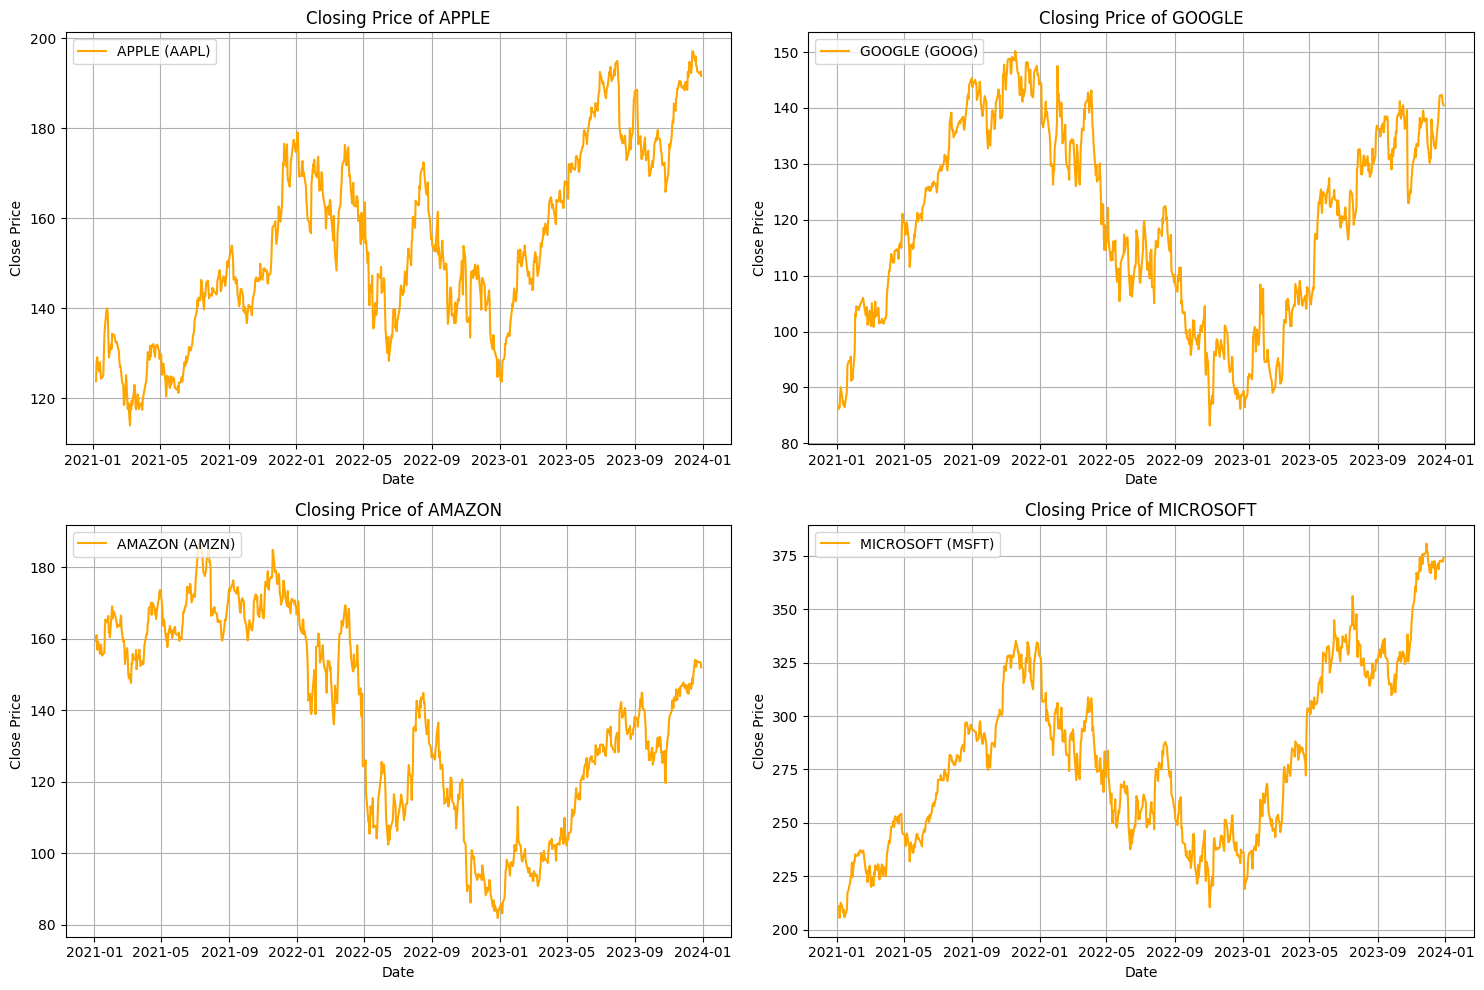

In [6]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, hspace=0.4)

unique_companies = df['Company Name'].unique()

for i, company in enumerate(unique_companies, 1):
    plt.subplot(2, 2, i)
    company_data = df[df['Company Name'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=f"{company} ({company_data['Ticker'].iloc[0]})", color='orange')
    plt.ylabel('Close Price')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {company}")
    plt.legend(loc="upper left")
    plt.grid(True)

plt.tight_layout()
plt.show()


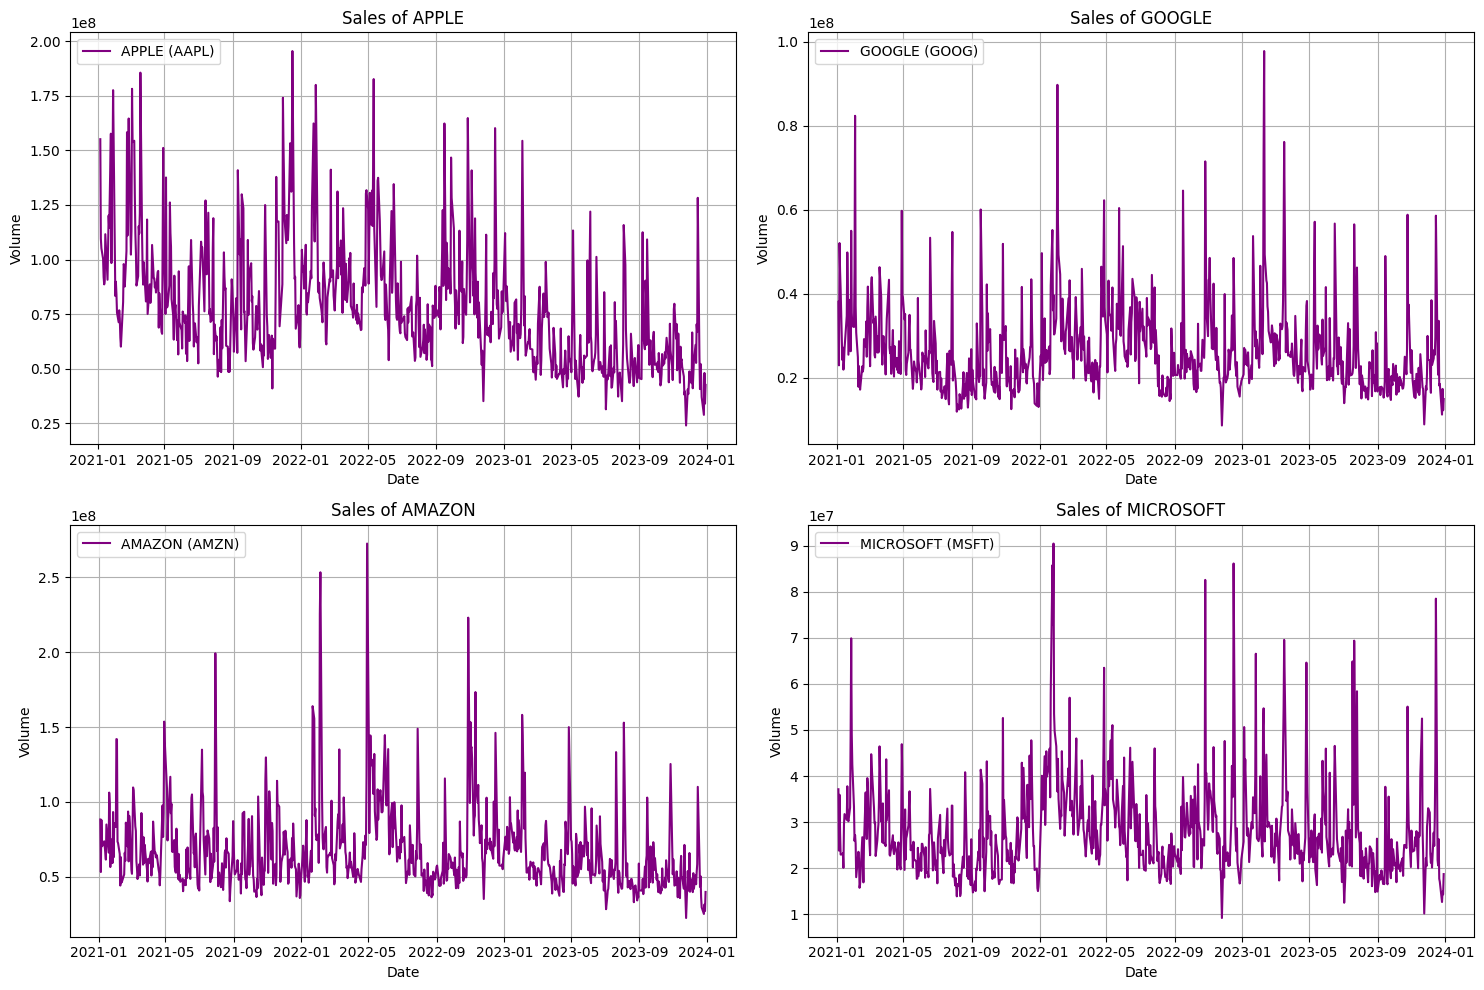

In [7]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, hspace=0.4)

for i, company in enumerate(unique_companies, 1):
    plt.subplot(2, 2, i)
    company_data = df[df['Company Name'] == company]
    plt.plot(company_data['Date'], company_data['Volume'], label=f"{company} ({company_data['Ticker'].iloc[0]})", color='purple')
    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.title(f"Sales of {company}")
    plt.legend(loc="upper left")
    plt.grid(True)

plt.tight_layout()
plt.show()

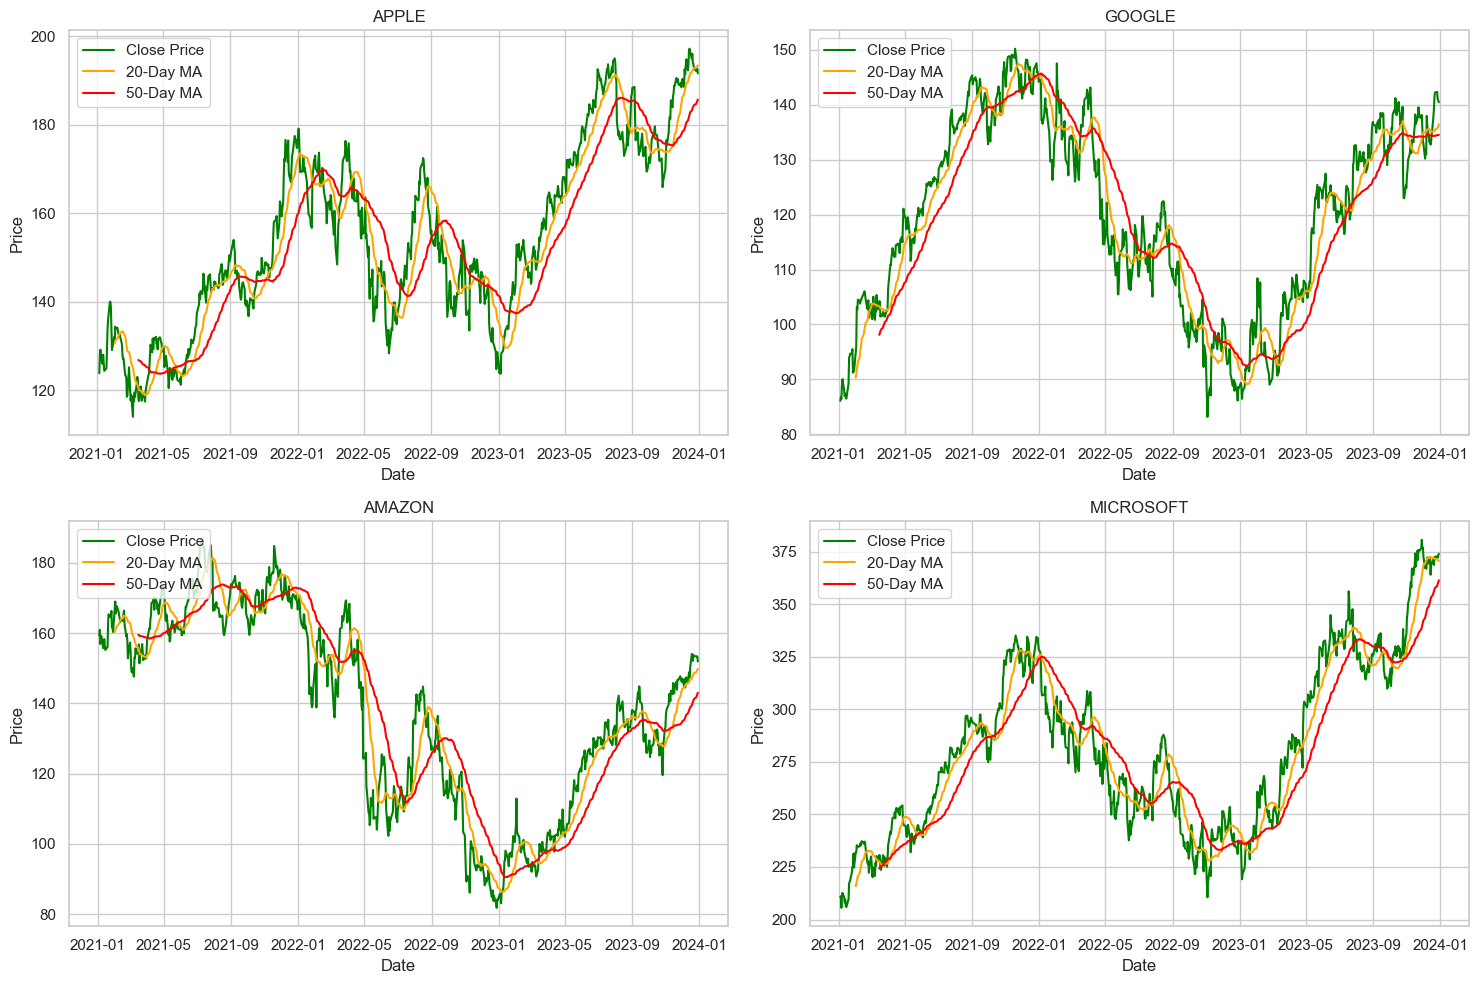

In [58]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, hspace=0.4)

for i, company in enumerate(unique_companies, 1):
    plt.subplot(2, 2, i)
    company_data = df[df['Company Name'] == company].copy()
    
    company_data['20-Day MA'] = company_data['Close'].rolling(window=20).mean()
    company_data['50-Day MA'] = company_data['Close'].rolling(window=50).mean()
    
    plt.plot(company_data['Date'], company_data['Close'], label="Close Price", color='green')
    
    plt.plot(company_data['Date'], company_data['20-Day MA'], label="20-Day MA", color='orange')

    plt.plot(company_data['Date'], company_data['50-Day MA'], label="50-Day MA", color='red')
    
    
    # Add labels and title
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.title(f"{company}")
    plt.legend(loc="upper left")
    plt.grid(True)

plt.tight_layout()
plt.show()


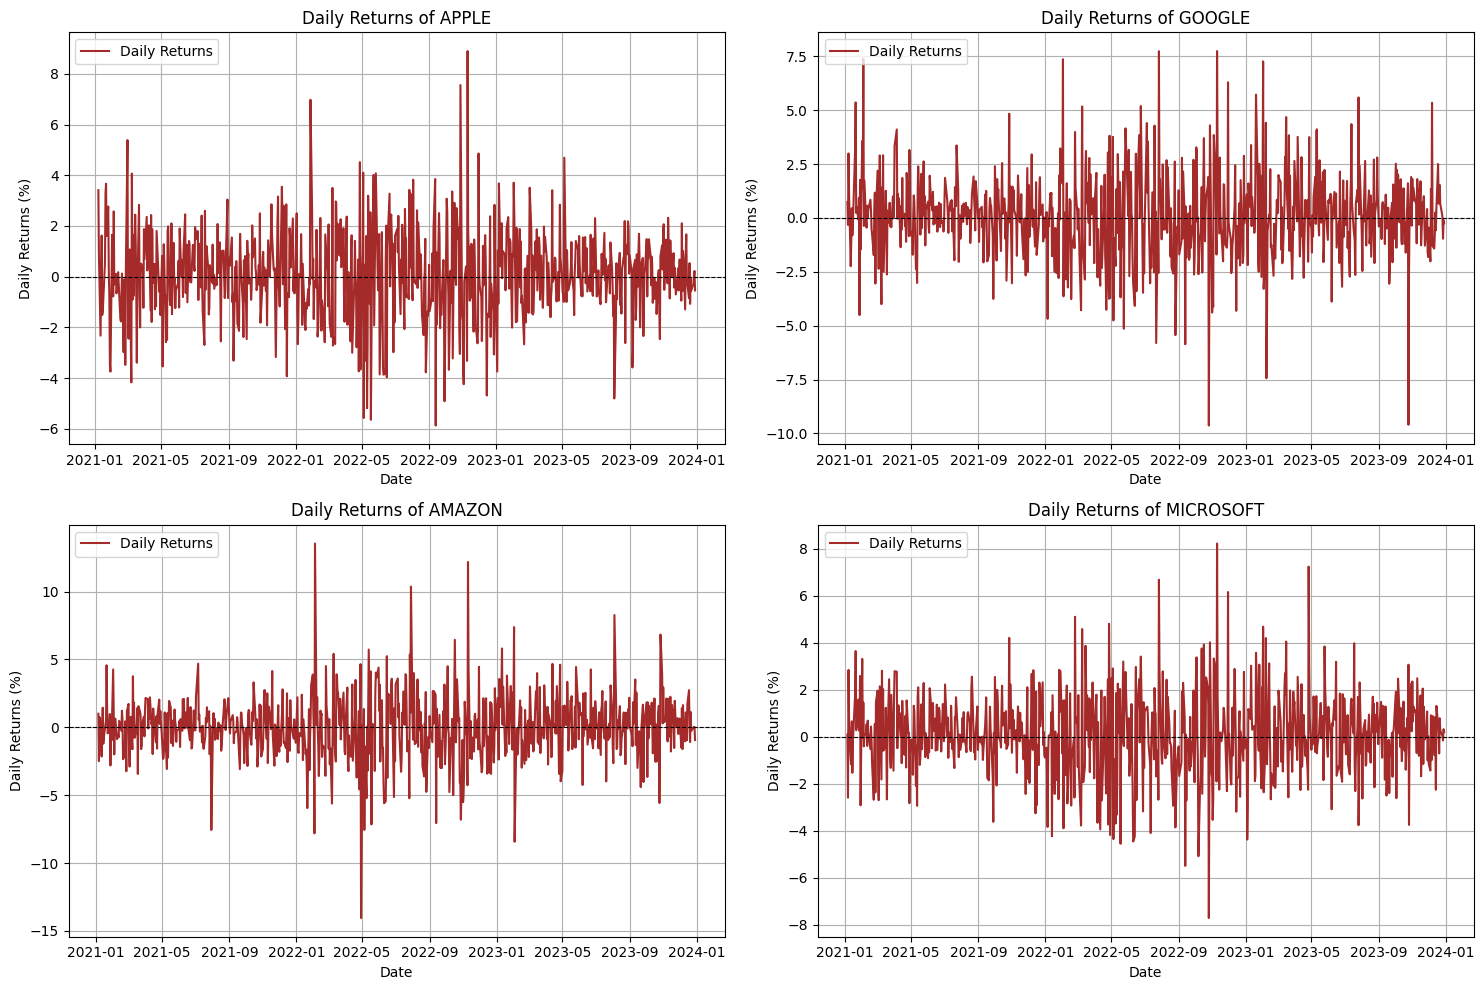

In [9]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, hspace=0.4)


for i, company in enumerate(unique_companies, 1):
    plt.subplot(2, 2, i)
    company_data = df[df['Company Name'] == company].copy()
    
    company_data['Daily Returns'] = company_data['Close'].pct_change() * 100  # Convert to percentage
    
    plt.plot(company_data['Date'], company_data['Daily Returns'], label="Daily Returns", color='brown')
    
    plt.ylabel('Daily Returns (%)')
    plt.xlabel('Date')
    plt.title(f"Daily Returns of {company}")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add a horizontal line at y=0
    plt.legend(loc="upper left")
    plt.grid(True)

plt.tight_layout()
plt.show()


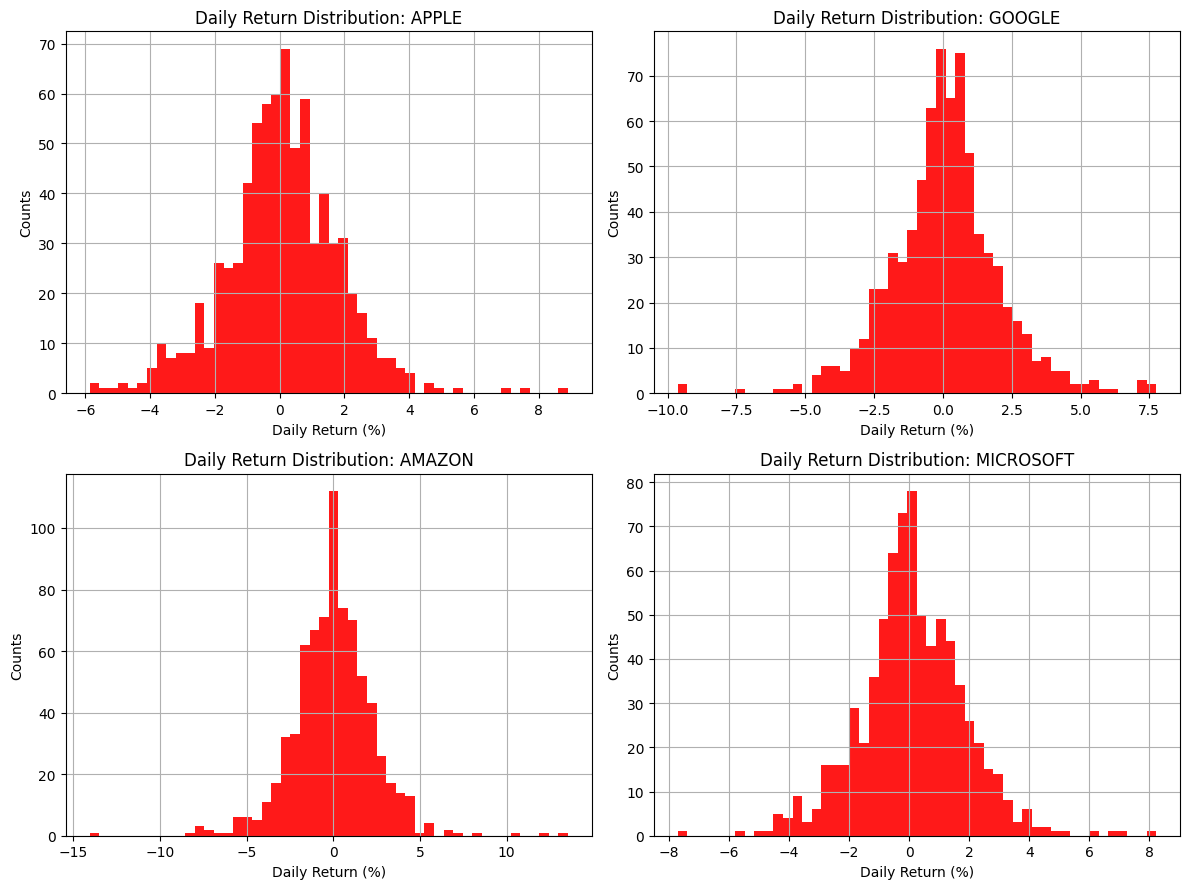

In [10]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(unique_companies, 1):
    plt.subplot(2, 2, i)
    
    company_data = df[df['Company Name'] == company].copy()
    
    company_data['Daily Return'] = company_data['Close'].pct_change() * 100 
    
    company_data['Daily Return'].hist(bins=50, color='red', alpha=0.9)
    
    plt.xlabel('Daily Return (%)')
    plt.ylabel('Counts')
    plt.title(f'Daily Return Distribution: {company}')

plt.tight_layout()
plt.show()


In [11]:
closing_df = df.pivot_table(index='Date', columns='Company Name', values='Close')

# Calculate percentage changes for each company
company = closing_df.pct_change()

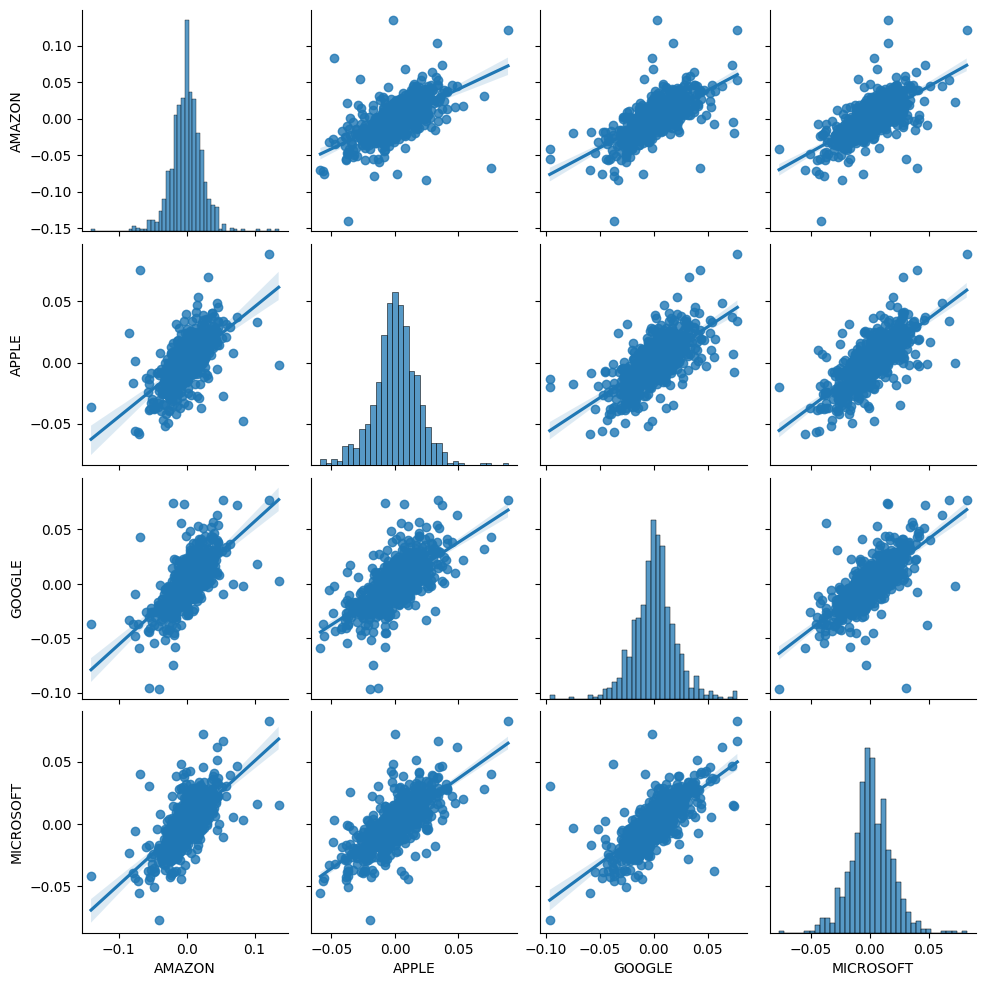

In [12]:
sns.pairplot(company,kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

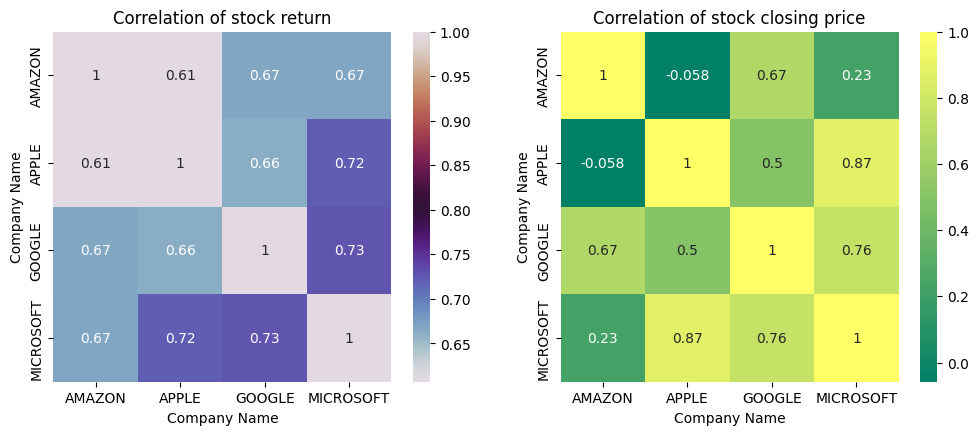

In [13]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(company.corr(), annot=True, cmap='twilight')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

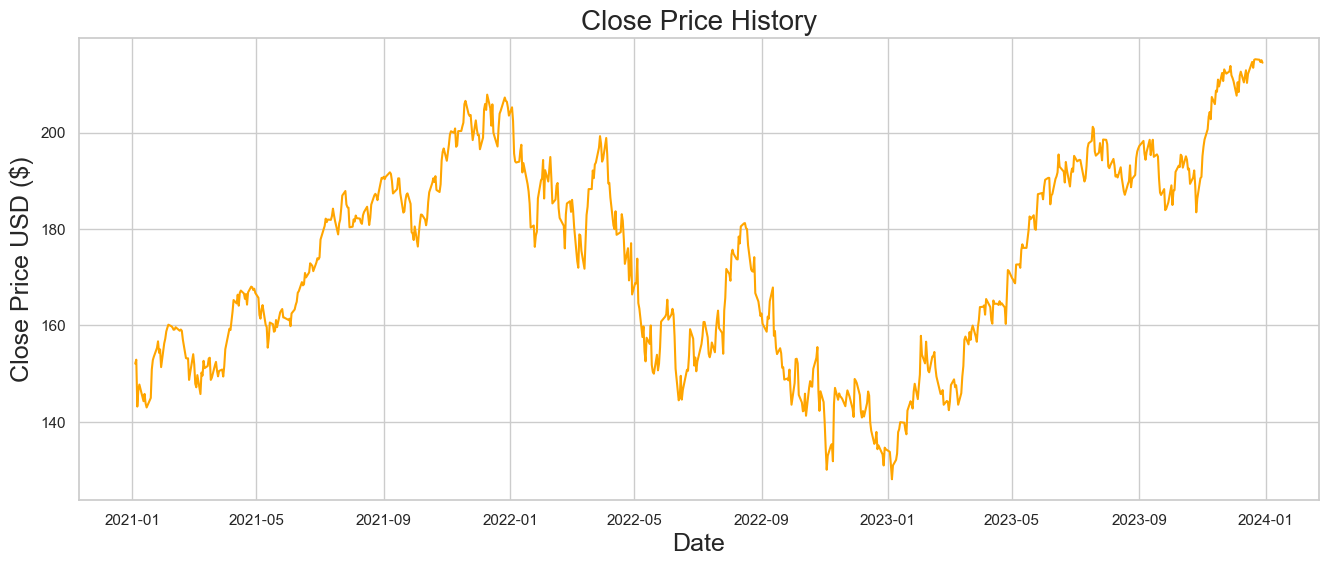

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
sns.lineplot(data=df, x='date', y='Close', color='orange', ci=None)
plt.title('Close Price History', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [52]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2860

In [53]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14048353],
       [0.15462116],
       [0.15831927],
       ...,
       [0.97127485],
       [0.97530229],
       [0.97783195]])

In [54]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.14048353, 0.15462116, 0.15831927, 0.14827228, 0.14768328,
       0.154523  , 0.1480432 , 0.14225078, 0.14450886, 0.15825385,
       0.17409313, 0.18129285, 0.1938925 , 0.19467791, 0.19107804,
       0.17481312, 0.15802466, 0.16515892, 0.16794069, 0.16450455,
       0.17579489, 0.17440193, 0.17489366, 0.17194383, 0.16991187,
       0.16905967, 0.16984625, 0.16270132, 0.15499926, 0.15129578,
       0.15181998, 0.13913613, 0.13867732, 0.13700574, 0.12271589,
       0.1236008 , 0.14500285, 0.13625192, 0.12622278, 0.11989715,
       0.12412518, 0.10754107, 0.12304364, 0.11940563, 0.12589509,
       0.12284698, 0.13254832, 0.13772676, 0.13507202, 0.12120821,
       0.11943841, 0.13058183, 0.12779603, 0.11976613, 0.12140482,
       0.12343688, 0.12402685, 0.1191434 , 0.1265178 , 0.1293036 ])]
[0.13880838115645433]

[array([0.14048353, 0.15462116, 0.15831927, 0.14827228, 0.14768328,
       0.154523  , 0.1480432 , 0.14225078, 0.14450886, 0.15825385,
       0.17409313, 0.18129285, 0.19

In [57]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2800/2800 [==============================] - 116s 40ms/step - loss: 0.0014
Epoch 2/5
2800/2800 [==============================] - 114s 41ms/step - loss: 5.2650e-04
Epoch 3/5
2800/2800 [==============================] - 114s 41ms/step - loss: 4.4681e-04
Epoch 4/5
2800/2800 [==============================] - 113s 40ms/step - loss: 3.9658e-04
Epoch 5/5
2800/2800 [==============================] - 114s 41ms/step - loss: 3.6593e-04


In [19]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 2s 38ms/step


6.096028726603769

Index(['Close'], dtype='object')


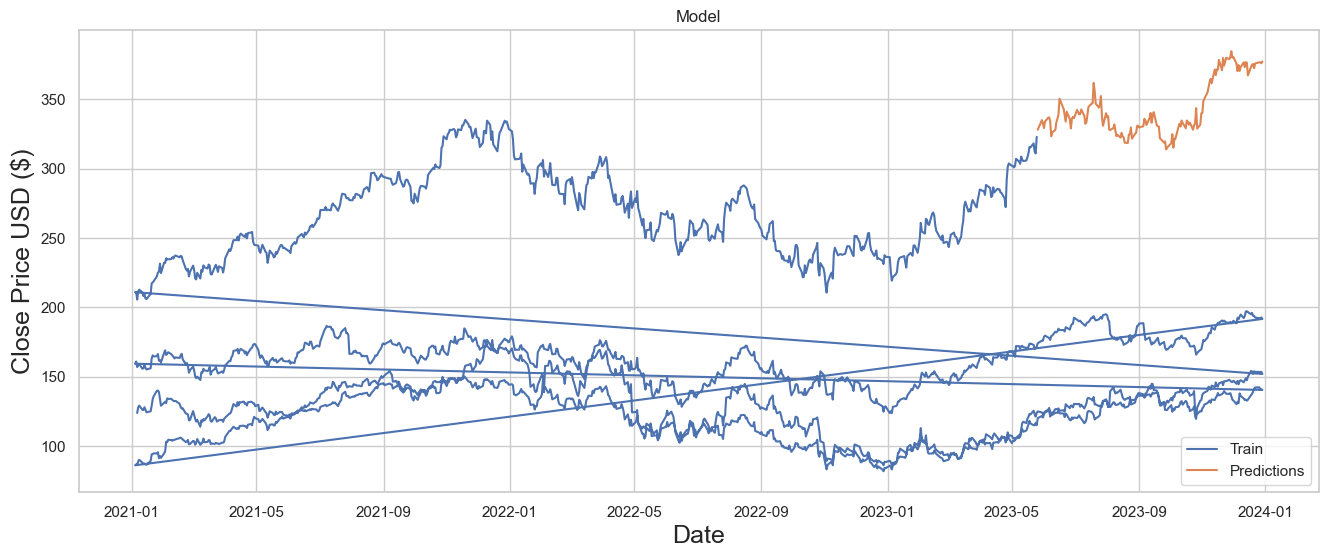

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

print(data.columns)

train = data[:training_data_len]
valid = data[training_data_len:]

train_dates = df['Date'][:training_data_len]
valid_dates = df['Date'][training_data_len:]

valid.loc[:, 'Predictions'] = predictions

plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'], label='Train')
plt.plot(valid_dates, valid['Predictions'], label='Predictions')

plt.legend(loc='lower right')

plt.show()

